In [ ]:
!pip install cvxopt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

In [ ]:
## data

# Sample data
X = np.array([[2, 2],
              [2, 0],
              [0, 0],
              [1, 1]])
y = np.array([1, 1, -1, -1])

In [ ]:
# Compute the kernel (linear in this case)
K = np.dot(X, X.T)

# Construct the matrices for the quadratic programming problem
P = matrix(np.outer(y, y) * K, tc='d')
q = matrix(-np.ones(len(X)), tc='d')
A = matrix(y, (1, len(X)), tc='d')
b = matrix(0.0, tc='d')
G = matrix(-np.eye(len(X)), tc='d')
h = matrix(np.zeros(len(X)), tc='d')

# Solve the quadratic programming problem
solution = solvers.qp(P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -1.2800e+00 -3.2000e+00  8e+00  2e+00  2e+00
 1: -2.1716e+00 -2.6261e+00  7e-01  2e-01  2e-01
 2: -1.9996e+00 -2.0114e+00  1e-02  4e-16  1e-15
 3: -2.0000e+00 -2.0001e+00  1e-04  1e-15  5e-16
 4: -2.0000e+00 -2.0000e+00  1e-06  4e-16  5e-16
Optimal solution found.


In [ ]:
solution

{'x': <4x1 matrix, tc='d'>,
 'y': <1x1 matrix, tc='d'>,
 's': <4x1 matrix, tc='d'>,
 'z': <4x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 1.1752696158226515e-06,
 'relative gap': 5.876348194707588e-07,
 'primal objective': -1.999999960657767,
 'dual objective': -2.0000011359273815,
 'primal infeasibility': 4.440892098501624e-16,
 'dual infeasibility': 4.655145010143737e-16,
 'primal slack': 1.9671036132199486e-08,
 'dual slack': 1.9315903190916117e-07,
 'iterations': 4}

In [ ]:
# Extract Lagrange multipliers
alphas = np.array(solution['x'])

# Identify support vectors
support_vectors = np.where(alphas > 1e-5)[0]
support_vectors

array([0, 1, 3])

In [ ]:
# Calculate the weight vector
w = np.sum(alphas[support_vectors] * y[support_vectors, None] * X[support_vectors], axis=0)

# Calculate the bias term
b = y[support_vectors] - np.dot(X[support_vectors], w)
bias = np.mean(b)

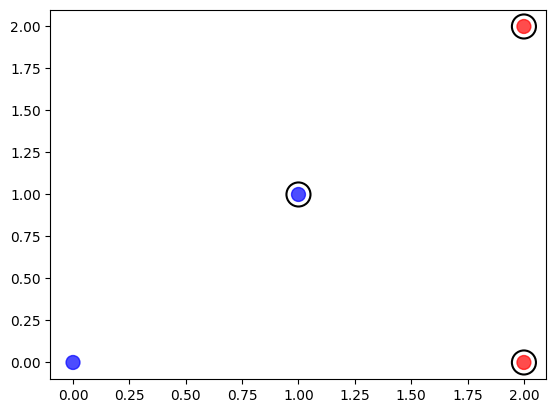

In [ ]:
# Plotting the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='bwr', alpha=0.7)

# Highlight the support vectors
plt.scatter(X[support_vectors][:, 0], X[support_vectors][:, 1], s=300,
            facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

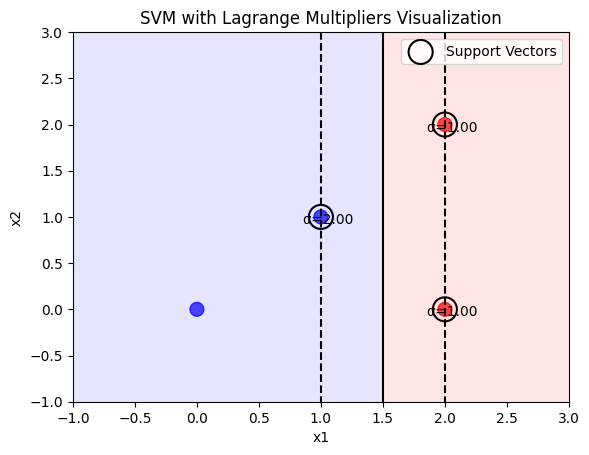

In [ ]:
# Plotting the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='bwr', alpha=0.7)

# Highlight the support vectors
plt.scatter(X[support_vectors][:, 0], X[support_vectors][:, 1], s=300,
            facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')
# Plot the decision boundary and margins
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + bias
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.contourf(xx, yy, Z, levels=[-10, 0, 10], alpha=0.1, colors=['blue', 'red'])

# Annotating Lagrange multipliers on support vectors
for i in support_vectors:
    plt.annotate(f'α={alphas[i][0]:.2f}', (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(5,-5), ha='center')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.title('SVM with Lagrange Multipliers Visualization')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
w

array([2.00000057e+00, 5.69292471e-08])

In [ ]:
support_vectors

array([0, 1, 3])

<Axes: >

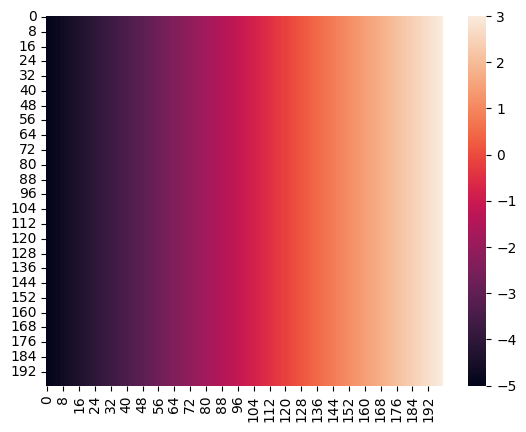

In [ ]:
import seaborn as sns
sns.heatmap(Z)

<Axes: >

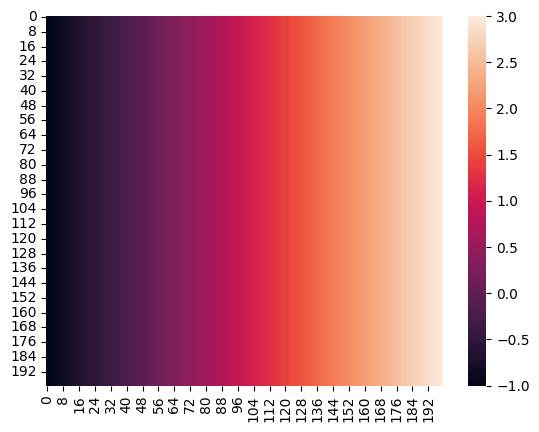

In [ ]:
sns.heatmap(xx)

<Axes: >

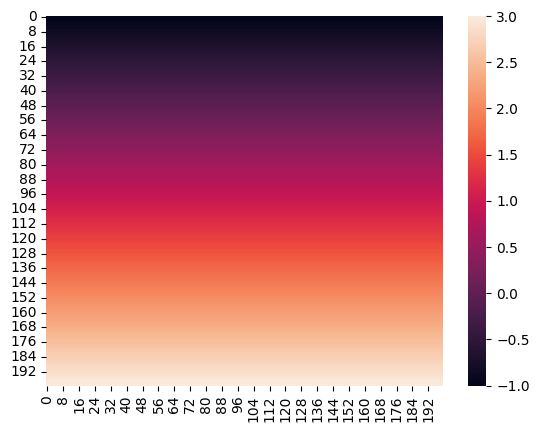

In [ ]:
sns.heatmap(yy)

## Hyperplane and distance visualization



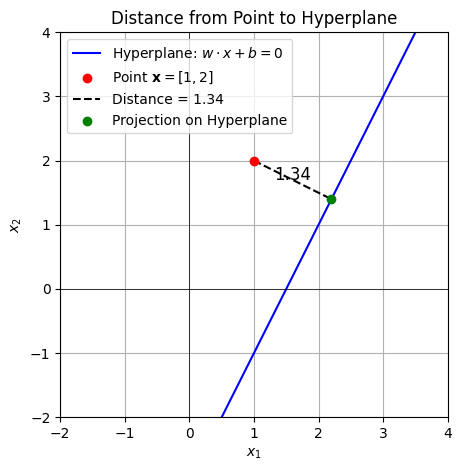

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax =plt.subplots(figsize=(5,5))
# Define the hyperplane (line) parameters
w = np.array([2, -1])  # normal vector to the hyperplane
b = -3  # bias term

# Define a point
x = np.array([1, 2])  # point to calculate distance from

# Calculate the distance from the point to the hyperplane
distance = np.abs(np.dot(w, x) + b) / np.linalg.norm(w)

# Calculate the projection of the point onto the hyperplane
projection = x - ((np.dot(w, x) + b) / np.linalg.norm(w)**2) * w

# Define the hyperplane (line) equation
def hyperplane(x1):
    return (-w[0] * x1 - b) / w[1]

# Generate x1 values
x1_values = np.linspace(-2, 4, 100)
x2_values = hyperplane(x1_values)

# Plot the hyperplane (line)
plt.plot(x1_values, x2_values, label='Hyperplane: $w \\cdot x + b = 0$', color='blue')

# Plot the point
plt.scatter(x[0], x[1], color='red', label=f'Point $\\mathbf{{x}} = [{x[0]}, {x[1]}]$', zorder=5)

# Plot the perpendicular line (distance)
plt.plot([x[0], projection[0]], [x[1], projection[1]], 'k--', label=f'Distance = {distance:.2f}', zorder=4)

# Plot the closest point on the hyperplane
plt.scatter(projection[0], projection[1], color='green', label='Projection on Hyperplane', zorder=5)

# Annotate the distance
plt.text((x[0] + projection[0]) / 2, (x[1] + projection[1]) / 2, f'{distance:.2f}', fontsize=12, ha='center')

# Set plot limits
plt.xlim(-2, 4)
plt.ylim(-2, 4)

# Add labels and title
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Distance from Point to Hyperplane')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()


In [ ]:
w

array([ 2, -1])

In [ ]:
np.linalg.norm(w)

2.23606797749979

## SVM sample

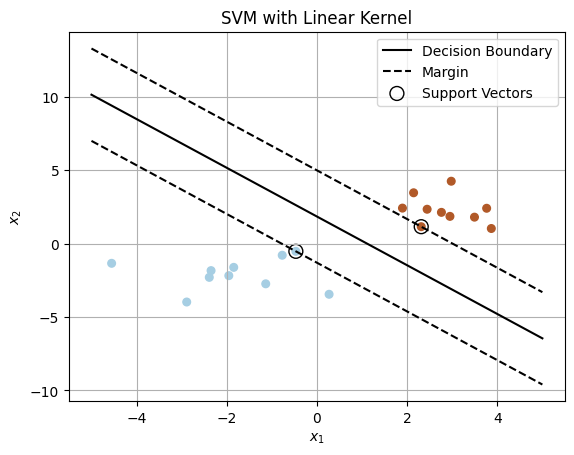

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate sample data
np.random.seed(0)
# Points for class 1
X1 = np.random.randn(10, 2) + [2, 2]
# Points for class 2
X2 = np.random.randn(10, 2) + [-2, -2]
# Combine the points
X = np.vstack((X1, X2))
y = np.hstack((np.ones(10), -np.ones(10)))

# Fit SVM model
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Get the separating hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]
xx = np.linspace(-5, 5)
yy = -(w[0] / w[1]) * xx - b / w[1]

# Plot the points and hyperplane
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.plot(xx, yy, 'k-', label='Decision Boundary')

# Plot the margin lines
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy + np.sqrt(1 + (w[0] / w[1]) ** 2) * margin
yy_up = yy - np.sqrt(1 + (w[0] / w[1]) ** 2) * margin
plt.plot(xx, yy_down, 'k--', label='Margin')
plt.plot(xx, yy_up, 'k--')

# Highlight the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('SVM with Linear Kernel')
plt.grid(True)
plt.show()

In [ ]:
w

array([0.52752849, 0.31810566])

## Margin lines and vertical distance

1. **SVM Decision Boundary**  
In a linear SVM, the decision boundary (hyperplane) is represented by the equation:

$$
w_0 x_1 + w_1 x_2 + b = 0
$$

Where:

- $ w_0 $ and $ w_1 $ are the components of the normal vector $ \mathbf{w} = [w_0, w_1] $.
- $ b $ is the bias term (intercept).

Rearranging this equation, we can express $ x_2 $ as a function of $ x_1 $:

$$
x_2 = -\frac{w_0}{w_1} x_1 - \frac{b}{w_1}
$$

This is the equation of a straight line (the decision boundary) with:

- **Slope**: $ -\frac{w_0}{w_1} $
- **Intercept**: $ -\frac{b}{w_1} $

2. **Margin Lines**  
The margin in an SVM refers to the distance between the decision boundary and the closest points (support vectors). The goal is to draw two parallel lines at this distance on either side of the decision boundary.

The margin width is given by:

$$
\text{Margin} = \frac{1}{\|\mathbf{w}\|}
$$

Where $ \|\mathbf{w}\| $ is the Euclidean norm of the normal vector $ \mathbf{w} = [w_0, w_1] $:

$$
\|\mathbf{w}\| = \sqrt{w_0^2 + w_1^2}
$$

However, the margin is a perpendicular distance from the decision boundary, and we need to translate this perpendicular distance into a vertical offset in the $ x_2 $-direction (y-axis in a plot).

3. **Vertical Distance Adjustment**  
The expression `np.sqrt(1 + (w[0] / w[1]) ** 2)` arises from the geometry of the line. It scales the margin distance in terms of $ x_2 $ (vertical) coordinates because the decision boundary is not necessarily horizontal.

Here’s why:

The margin is a perpendicular distance from the decision boundary. The actual vertical distance (in the $ x_2 $ direction) for a margin width $ \frac{1}{\|\mathbf{w}\|} $ depends on the slope of the decision boundary.

For a line with slope $ m = -\frac{w_0}{w_1} $, the vertical distance (in the $ x_2 $-axis) corresponding to a given perpendicular distance $ d $ is:

$$
\text{Vertical Distance} = d \cdot \sqrt{1 + m^2}
$$

Where $ m = \frac{w_0}{w_1} $.

This formula arises from the Pythagorean theorem. If you have a slope $ m $, then the horizontal distance $ d_x $ and the vertical distance $ d_y $ are related as follows:

$$
\text{Perpendicular Distance} = \sqrt{d_x^2 + d_y^2} = d
$$

The term $ \sqrt{1 + m^2} $ adjusts the perpendicular margin distance $ d $ into a vertical distance for plotting on the $ x_2 $-axis.

4. **Putting It Together**  
The term `np.sqrt(1 + (w[0] / w[1]) ** 2)` effectively scales the margin width in the vertical direction $ x_2 $ based on the slope of the decision boundary.

If the slope is steep (large $ w[0] / w[1] $), the factor will increase the vertical distance more, ensuring that the margin lines are correctly spaced from the decision boundary, even when the boundary is not horizontal.

**Example**:  
Let’s say $ w_0 = 2 $ and $ w_1 = 1 $.

- **Slope**: $ m = -\frac{w_0}{w_1} = -2 $
- **Vertical Distance Scaling**:

$$
\sqrt{1 + \left( \frac{w_0}{w_1} \right)^2} = \sqrt{1 + 2^2} = \sqrt{5} \approx 2.236
$$

Thus, the vertical distance for the margin lines will be scaled by approximately 2.236 times the margin width to account for the slope of the line.

### Vertical distance, more detailed
The **1** in the formula for the vertical distance $d \cdot \sqrt{1 + m^2}$ comes from the application of the Pythagorean theorem in the context of a right triangle. This formula converts the perpendicular distance $d$ to a line (or hyperplane) into a vertical distance for plotting.

Let’s break this down in detail to understand where the **1** comes from.

### 1. Pythagorean Theorem Setup

The key concept is that we are dealing with the geometry of a right triangle. Specifically, we want to convert a perpendicular distance to the line (or margin) into its corresponding horizontal and vertical components.

Consider a line with slope $m$, which is expressed in terms of the rise over run (change in $x_2$ over $x_1$):

$$
m = \frac{\text{change in } x_2}{\text{change in } x_1} = \frac{\Delta x_2}{\Delta x_1}
$$

We are dealing with a triangle where:
- One leg is the horizontal distance $d_x = \Delta x_1$.
- The other leg is the vertical distance $d_y = \Delta x_2$.
- The hypotenuse represents the perpendicular distance $d$ to the line.

### 2. Understanding the Right Triangle

In the right triangle:
- The horizontal leg (along the $x_1$-axis) is $d_x$.
- The vertical leg (along the $x_2$-axis) is $d_y = m \cdot d_x$ (since $m = \frac{d_y}{d_x}$).
- The hypotenuse is the perpendicular distance $d$.

Using the Pythagorean theorem:

$$
d^2 = d_x^2 + d_y^2
$$

Substituting $d_y = m \cdot d_x$:

$$
d^2 = d_x^2 + (m \cdot d_x)^2 = d_x^2 + m^2 \cdot d_x^2
$$

Factoring out $d_x^2$:

$$
d^2 = d_x^2 (1 + m^2)
$$

Taking the square root of both sides:

$$
d = d_x \cdot \sqrt{1 + m^2}
$$

### 3. Solving for $d_x$ and Vertical Distance

Now, we are interested in the vertical distance $d_y$ (which corresponds to how far the margin line moves vertically), given the perpendicular distance $d$.

From the equation $d = d_x \cdot \sqrt{1 + m^2}$, we can solve for $d_x$:

$$
d_x = \frac{d}{\sqrt{1 + m^2}}
$$

Finally, using $d_y = m \cdot d_x$, we can express $d_y$ in terms of $d$:

$$
d_y = m \cdot \frac{d}{\sqrt{1 + m^2}} = \frac{m \cdot d}{\sqrt{1 + m^2}}
$$

But instead of solving this for just $d_x$ or $d_y$, we scale the perpendicular distance $d$ into the vertical distance directly by using $\sqrt{1 + m^2}$.

### 4. Why the **1**?

The **1** in the term $\sqrt{1 + m^2}$ comes from the horizontal distance component. In the Pythagorean theorem:

$$
d^2 = d_x^2 + d_y^2
$$

The $d_x^2$ term is represented by the **1** because the horizontal leg is $d_x$, which scales as **1** relative to the change in vertical distance, hence:

$$
\sqrt{1 + m^2}
$$

Thus, the **1** corresponds to the horizontal distance component, and $m^2$ corresponds to the slope squared or the vertical scaling factor.


## more about margin
The margin is defined as the perpendicular distance from the hyperplane to the closest data points (the support vectors). To find this distance, we use the formula for the distance from a point to the hyperplane:

$$
d = \frac{| \mathbf{w} \cdot \mathbf{x} + b |}{\|\mathbf{w}\|}
$$

For support vectors, the points that lie on the margin satisfy the equation:

$$
\mathbf{w} \cdot \mathbf{x} + b = \pm 1
$$

Therefore, the distance between the hyperplane and the support vectors is:

$$
d = \frac{1}{\|\mathbf{w}\|}
$$

This shows that the margin width is inversely proportional to $ \|\mathbf{w}\| $. The larger the norm $ \|\mathbf{w}\| $, the smaller the margin width, and vice versa.


In [ ]:
margin

1.6233305813610541

## 3-D example

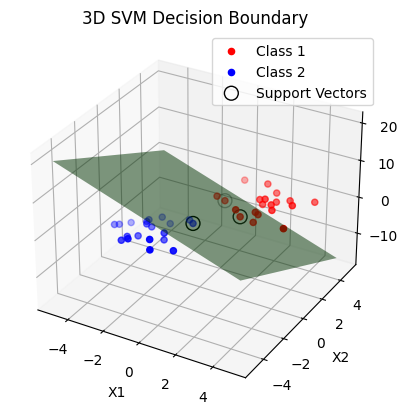

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D

# Generate 3D sample data
np.random.seed(0)
# Points for class 1
X1 = np.random.randn(20, 3) + [2, 2, 2]
# Points for class 2
X2 = np.random.randn(20, 3) + [-2, -2, -2]
# Combine the points
X = np.vstack((X1, X2))
y = np.hstack((np.ones(20), -np.ones(20)))

# Fit SVM model
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Get the separating hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]

# Create a meshgrid for plotting the decision boundary
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))

# Calculate the decision boundary z = (-w[0] * x - w[1] * y - b) / w[2]
zz = (-w[0] * xx - w[1] * yy - b) / w[2]

# Plotting in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(X[y==1][:, 0], X[y==1][:, 1], X[y==1][:, 2], color='r', label='Class 1')
ax.scatter(X[y==-1][:, 0], X[y==-1][:, 1], X[y==-1][:, 2], color='b', label='Class 2')

# Plot the decision boundary
ax.plot_surface(xx, yy, zz, color='g', alpha=0.5, rstride=100, cstride=100)

# Highlight the support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], clf.support_vectors_[:, 2],
           s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('3D SVM Decision Boundary')
ax.legend()

plt.show()


## Visualize W and perpendicularity

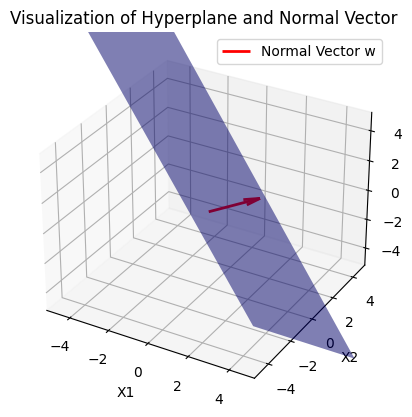

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the normal vector w and the bias term b (hyperplane equation: w.x + b = 0)
w = np.array([2, 1, 1])  # Normal vector to the hyperplane
b = -3                   # Bias term (offset from the origin)

# Generate the x and y values for the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))

# Calculate the corresponding z values for the plane using the hyperplane equation: w0*x + w1*y + w2*z + b = 0
# Rearranged: z = (-w0*x - w1*y - b) / w2
zz = (-w[0] * xx - w[1] * yy - b) / w[2]

# Create a figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the hyperplane (3D plane)
ax.plot_surface(xx, yy, zz, color='blue', alpha=0.5, rstride=100, cstride=100)

# Plot the normal vector w
# We'll start the vector at the origin and plot it as an arrow
origin = np.array([0, 0, 0])
ax.quiver(origin[0], origin[1], origin[2], w[0], w[1], w[2], color='red', linewidth=2, label='Normal Vector w')

# Add labels to the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Set limits for better visualization
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])

# Title and legend
ax.set_title('Visualization of Hyperplane and Normal Vector')
ax.legend()

# Show the plot
plt.show()


<Figure size 640x480 with 0 Axes>

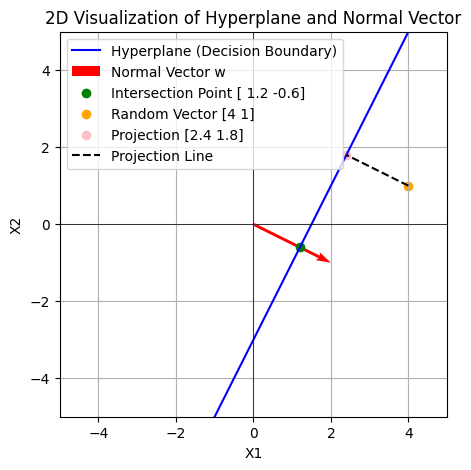

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the normal vector w and the bias term b (line equation: w.x + b = 0)
w = np.array([2, -1])  # Normal vector to the line
b = -3                 # Bias term (offset from the origin)

# Generate the x values for the line
x_values = np.linspace(-5, 5, 100)

# Calculate the corresponding y values for the line using the equation: w0*x + w1*y + b = 0
# Rearranged: y = (-w0*x - b) / w1
y_values = (-w[0] * x_values - b) / w[1]

# Create the figure for 2D plotting
plt.figure()

fix, ax =plt.subplots(figsize=(5,5))

# Plot the line (2D hyperplane)
plt.plot(x_values, y_values, label='Hyperplane (Decision Boundary)', color='blue')

# Plot the normal vector w as an arrow
# We'll place the arrow at the origin
origin = np.array([0, 0])
plt.quiver(origin[0], origin[1], w[0], w[1], angles='xy', scale_units='xy',
           scale=1, color='red', label='Normal Vector w')

# Calculate the intersection point (projection of the origin onto the hyperplane)
w_norm_squared = np.sum(w ** 2)  # Norm of w squared
t = -b / w_norm_squared          # Scalar to scale the normal vector
intersection_point = t * w       # Intersection point

# Plot the intersection point
plt.scatter(intersection_point[0], intersection_point[1], color='green', label=f'Intersection Point {intersection_point}')


# Generate a random vector which is not perpendicular to the hyperplane
random_vector = np.array([4, 1])  # Random point

# Calculate the projection of the random vector onto the hyperplane
w_norm_squared = np.sum(w ** 2)  # Norm of w squared
projection = random_vector - (np.dot(w, random_vector) + b) / w_norm_squared * w  # Projection formula

# Plot the random vector
plt.scatter(random_vector[0], random_vector[1], color='orange', label=f'Random Vector {random_vector}')

# Plot the projection of the random vector
plt.scatter(projection[0], projection[1], color='pink', label=f'Projection {projection}')

# Draw a dashed line from the random vector to its projection
plt.plot([random_vector[0], projection[0]], [random_vector[1], projection[1]], 'k--', label='Projection Line')


# Set limits for better visualization
plt.xlim([-5, 5])
plt.ylim([-5, 5])

# Add labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Visualization of Hyperplane and Normal Vector')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()


In [ ]:
w[0]*4+w[1]*-4+-3

9

In [ ]:
w[0]*-4+w[1]*-4+-3

-7

In [ ]:
1+4/5

1.8

In [ ]:
w_norm_squared

5

## projection calculation

### Step-by-Step Breakdown:

#### 1. **Hyperplane Equation**:
The hyperplane is defined by the equation:

$$
\mathbf{w} \cdot \mathbf{x} + b = 0
$$

Where:
- $ \mathbf{w} $ is the **normal vector** to the hyperplane.
- $ \mathbf{x} $ is a point on the hyperplane.
- $ b $ is the **bias** term (intercept), which determines how far the hyperplane is shifted from the origin.

#### 2. **Understanding the Projection**:
The goal is to find the **projection** of a point (such as the origin or any random point) onto the hyperplane along the direction of the normal vector $ \mathbf{w} $.

- The **normal vector** $ \mathbf{w} $ defines the direction perpendicular to the hyperplane.
- The **projection** onto the hyperplane will move along this direction, scaling $ \mathbf{w} $ by some factor to give the point on the hyperplane.

#### 3. **Finding the Projection (Intersection Point)**:
Let’s say we want to find the intersection of the normal vector $ \mathbf{w} $ with the hyperplane. We assume that this intersection point $ \mathbf{x}_{\text{proj}} $ is **along the direction of $ \mathbf{w} $**, so we write:

$$
\mathbf{x}_{\text{proj}} = t \cdot \mathbf{w}
$$

We now need to solve for the scalar $ t $, which represents how far to move along $ \mathbf{w} $ to reach the projection point. To find $ t $, we substitute $ \mathbf{x}_{\text{proj}} = t \cdot \mathbf{w} $ into the hyperplane equation:

$$
\mathbf{w} \cdot (t \cdot \mathbf{w}) + b = 0
$$

Simplifying this:

$$
t \cdot (\mathbf{w} \cdot \mathbf{w}) + b = 0
$$

$$
t \cdot \|\mathbf{w}\|^2 + b = 0
$$

Solving for $ t $:

$$
t = \frac{-b}{\|\mathbf{w}\|^2}
$$

This scalar $ t $ tells us how much to scale the normal vector $ \mathbf{w} $ to reach the projection point on the hyperplane.

#### 4. **Calculating the Intersection Point**:
Once $ t $ is determined, the intersection point (projection of the origin onto the hyperplane) is:

$$
\mathbf{x}_{\text{proj}} = t \cdot \mathbf{w}
$$

Thus, by multiplying $ t $ with $ \mathbf{w} $, we get the point on the hyperplane that corresponds to the projection.

#### 5. **Why This Works**:
- The equation $ \mathbf{w} \cdot \mathbf{x} + b = 0 $ defines all points $ \mathbf{x} $ that lie on the hyperplane.
- By solving for $ t $ and scaling the normal vector $ \mathbf{w} $, we find the point on the hyperplane that is closest to a given point (e.g., the origin).
- $ t \cdot \mathbf{w} $ is the **vector projection** of the point onto the hyperplane, along the direction of the normal vector.

### Summary:
- $ \|\mathbf{w}\|^2 $: The norm of the normal vector $ \mathbf{w} $, squared, gives the magnitude of $ \mathbf{w} $ and helps scale the projection correctly.
- $ t = \frac{-b}{\|\mathbf{w}\|^2} $: This scalar $ t $ is the factor that scales $ \mathbf{w} $ to give the projection point.
- $ t \cdot \mathbf{w} $: This gives the actual intersection (projection) point on the hyperplane.

In simple terms, the procedure finds how far to move along the normal vector $ \mathbf{w} $ to reach the closest point on the hyperplane, starting from the origin or another reference point.


## random vector projection calculation

The goal is to project a random vector $ \mathbf{x}_{\text{rand}} $ onto the hyperplane. In simpler terms, we want to find the closest point on the hyperplane to $ \mathbf{x}_{\text{rand}} $. This involves moving from $ \mathbf{x}_{\text{rand}} $ in the direction of $ \mathbf{w} $ (the normal vector) until we reach the hyperplane.

### 3. General Projection Formula
In general, to project a point $ \mathbf{x}_{\text{rand}} $ onto a hyperplane, you need to:

1. **Find how far** $ \mathbf{x}_{\text{rand}} $ is from the hyperplane, in the direction of the normal vector $ \mathbf{w} $.
2. **Move in the direction of the normal vector** by a certain amount, based on this distance.

The projection formula can be written as:

$$
\mathbf{x}_{\text{proj}} = \mathbf{x}_{\text{rand}} - \frac{\mathbf{w} \cdot \mathbf{x}_{\text{rand}} + b}{\|\mathbf{w}\|^2} \cdot \mathbf{w}
$$

### 4. Breakdown of the Formula

Let’s break down each component of the formula:

- **$ \mathbf{w} \cdot \mathbf{x}_{\text{rand}} + b $**:

  This term represents the signed distance between the random vector $ \mathbf{x}_{\text{rand}} $ and the hyperplane.
  
  - If this term is zero, then $ \mathbf{x}_{\text{rand}} $ lies exactly on the hyperplane.
  - If it’s non-zero, the point lies either above or below the hyperplane.

- **$ \|\mathbf{w}\|^2 = \sum (w_i^2) $**:

  This is the squared norm of the normal vector $ \mathbf{w} $. The norm $ \|\mathbf{w}\| $ measures the magnitude of $ \mathbf{w} $, and squaring it ensures proper scaling in the projection formula.
  
  - By dividing the signed distance by $ \|\mathbf{w}\|^2 $, we normalize the contribution of the normal vector’s magnitude.

- **Projection Correction**:

  The term $ \frac{\mathbf{w} \cdot \mathbf{x}_{\text{rand}} + b}{\|\mathbf{w}\|^2} \cdot \mathbf{w} $ gives the amount of movement needed to bring the random vector $ \mathbf{x}_{\text{rand}} $ to the hyperplane along the direction of $ \mathbf{w} $.
  
  - This correction moves $ \mathbf{x}_{\text{rand}} $ closer or farther along the normal vector $ \mathbf{w} $ so that it lies on the hyperplane.

- **Final Projection**:

$$
\mathbf{x}_{\text{proj}} = \mathbf{x}_{\text{rand}} - \left( \frac{\mathbf{w} \cdot \mathbf{x}_{\text{rand}} + b}{\|\mathbf{w}\|^2} \right) \mathbf{w}
$$

  The random vector is corrected by subtracting the projection term, bringing it onto the hyperplane.


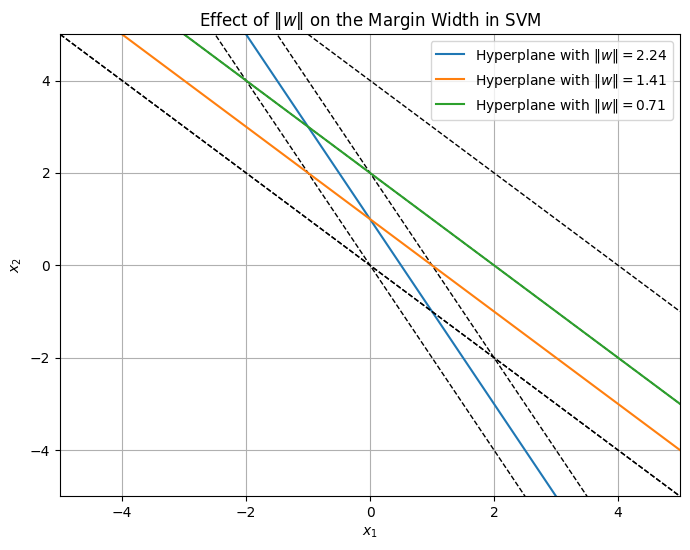

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define different normal vectors w (different norms)
w_values = [np.array([2, 1]), np.array([1, 1]), np.array([0.5, 0.5])]  # Varying magnitudes
b = -1  # Constant bias term

# Generate x values for plotting the decision boundary
x_values = np.linspace(-5, 5, 100)

# Create a figure for plotting
plt.figure(figsize=(8, 6))

# Iterate over different w vectors and plot the decision boundary and margins
for w in w_values:
    # Compute the decision boundary: w[0] * x1 + w[1] * x2 + b = 0
    # Rearranged as x2 = (-w[0] * x1 - b) / w[1]
    y_values = (-w[0] * x_values - b) / w[1]

    # Calculate the margin width
    margin = 1 / np.linalg.norm(w)

    # Plot the decision boundary
    plt.plot(x_values, y_values, label=f'Hyperplane with $\\|w\\| = {np.linalg.norm(w):.2f}$')

    # Plot the margin lines (parallel to the decision boundary)
    margin_offset = np.sqrt(1 + (w[0] / w[1]) ** 2) * margin
    y_margin_up = y_values + margin_offset
    y_margin_down = y_values - margin_offset

    # Plot margin lines
    plt.plot(x_values, y_margin_up, 'k--', linewidth=1)
    plt.plot(x_values, y_margin_down, 'k--', linewidth=1)

# Set labels and title
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Effect of $\\|w\\|$ on the Margin Width in SVM')
plt.xlim([-5, 5])
plt.ylim([-5, 5])

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


vectors with smaller norms will have larger margins, and vice versa

## Kernel trick

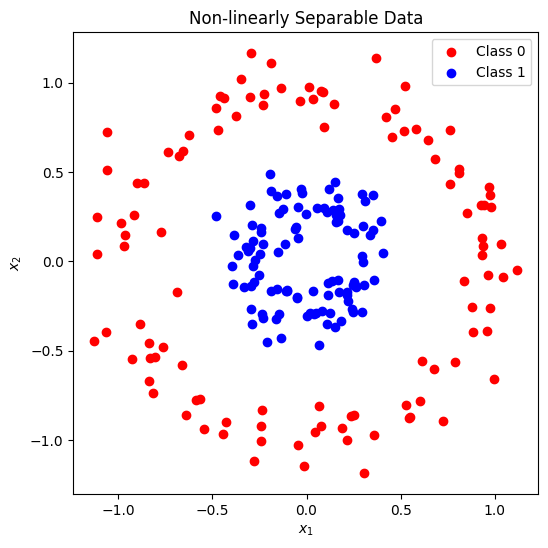

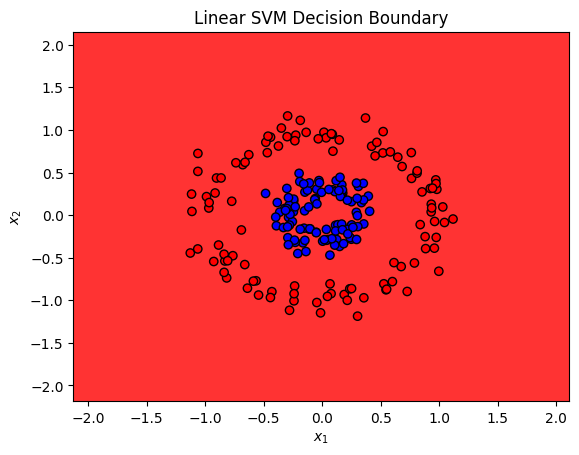

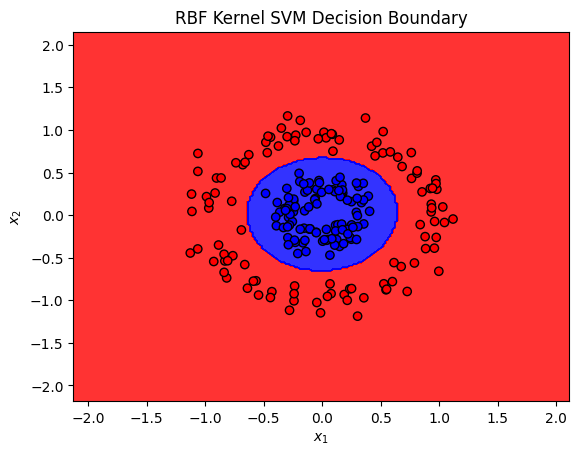

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Generate a toy dataset that is not linearly separable
X, y = datasets.make_circles(n_samples=300, factor=0.3, noise=0.1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot the data
def plot_data(X, y):
    plt.figure(figsize=(6, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
    plt.legend()
    plt.title('Non-linearly Separable Data')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

plot_data(X_train, y_train)

# Create and fit a linear SVM (without the kernel trick)
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Create and fit an RBF kernel SVM (with the kernel trick)
rbf_svm = SVC(kernel='rbf', gamma=1)
rbf_svm.fit(X_train, y_train)

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(('red', 'blue')))
    plt.title(title)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

# Plot decision boundary for the linear SVM
plot_decision_boundary(linear_svm, X_train, y_train, title='Linear SVM Decision Boundary')

# Plot decision boundary for the RBF kernel SVM
plot_decision_boundary(rbf_svm, X_train, y_train, title='RBF Kernel SVM Decision Boundary')


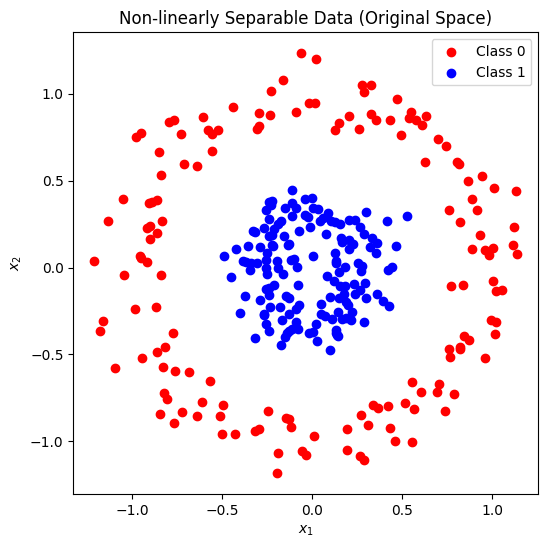

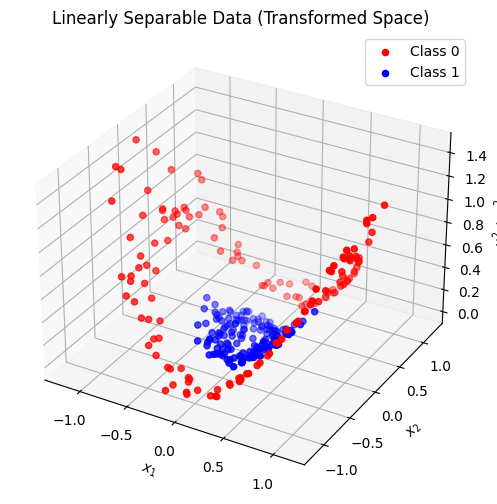

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D

# Generate non-linearly separable data (circles)
X, y = datasets.make_circles(n_samples=300, factor=0.3, noise=0.1)

# Plot the original data
def plot_data(X, y, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
    plt.title(title)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.show()

plot_data(X, y, title='Non-linearly Separable Data (Original Space)')

# Apply a polynomial kernel (degree=2) to map to a higher dimension
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Plot the transformed data in 3D (Transformed space)
def plot_transformed_data(X_transformed, y, title):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_transformed[y == 0, 0], X_transformed[y == 0, 1], X_transformed[y == 0, 2], color='red', label='Class 0')
    ax.scatter(X_transformed[y == 1, 0], X_transformed[y == 1, 1], X_transformed[y == 1, 2], color='blue', label='Class 1')
    ax.set_title(title)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_1^2 + x_2^2$')
    plt.legend()
    plt.show()

plot_transformed_data(X_poly, y, title='Linearly Separable Data (Transformed Space)')
